In [315]:
#importing imoportant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas_profiling
from collections import defaultdict
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_curve,roc_auc_score,precision_score,classification_report,confusion_matrix
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

In [316]:
df1 = pd.read_csv('transfer_history.csv')
df1.index.name = 'id'

In [317]:
df1


,TRANSFER_ID,PARTY_ID,CURRENCY,AMOUNT,VALUE_DATE
id,,,,,
0,369832601,240924299,HUF,500000,22-08-2018
1,369832704,323871147,HUF,190000,22-08-2018
2,369832705,349707008,HUF,1454874,22-08-2018
3,369832706,349707008,HUF,1502821,22-08-2018
4,369832784,240285235,HUF,369000,22-08-2018
...,...,...,...,...,...
307397,682694432,457359259,HUF,2273,12-10-2020
307398,682694636,345778398,HUF,152400,12-10-2020
307399,682694637,345778398,HUF,738640,12-10-2020


In [318]:
df1=df1.drop(['TRANSFER_ID', 'CURRENCY'], axis=1)

In [319]:
#getting the shape
df1.shape

(307402, 3)

In [320]:
#describing the data
df1.describe

<bound method NDFrame.describe of          PARTY_ID   AMOUNT  VALUE_DATE
id                                    
0       240924299   500000  22-08-2018
1       323871147   190000  22-08-2018
2       349707008  1454874  22-08-2018
3       349707008  1502821  22-08-2018
4       240285235   369000  22-08-2018
...           ...      ...         ...
307397  457359259     2273  12-10-2020
307398  345778398   152400  12-10-2020
307399  345778398   738640  12-10-2020
307400  345778398    74320  12-10-2020
307401  399992221   500000  12-10-2020

[307402 rows x 3 columns]>

In [321]:
df1.columns.values

array(['PARTY_ID', 'AMOUNT', 'VALUE_DATE'], dtype=object)

In [322]:
#Check for na or missing data
df1.isna().sum()

PARTY_ID      0
AMOUNT        0
VALUE_DATE    0
dtype: int64

In [323]:
#Show statistics on the current data 
df1.describe()

,PARTY_ID,AMOUNT
count,3.074020e+05,3.074020e+05
mean,3.408159e+08,2.958192e+05
std,9.867653e+07,4.829698e+06
min,2.338238e+08,1.000000e+00
25%,2.406957e+08,1.998200e+04
50%,3.408673e+08,7.000000e+04
75%,4.090455e+08,1.981200e+05
max,6.852197e+08,1.824990e+09


In [324]:
#checking the datatypes 
df1.dtypes

PARTY_ID       int64
AMOUNT         int64
VALUE_DATE    object
dtype: object

In [325]:
#counting the frequencies of a party_id
#arr= df1.PARTY_ID.unique()
df1.PARTY_ID.value_counts()

233824342    6953
234958234    5358
240924244    4169
240271273    3935
390447783    3885
             ... 
386511074       1
574544976       1
250704034       1
334245719       1
626648196       1
Name: PARTY_ID, Length: 2174, dtype: int64

In [326]:
#counting the number of logins of each member
df1['Counts'] = df1.groupby(['PARTY_ID'])['AMOUNT'].transform('count')

In [327]:
df1

,PARTY_ID,AMOUNT,VALUE_DATE,Counts
id,,,,
0,240924299,500000,22-08-2018,334
1,323871147,190000,22-08-2018,7
2,349707008,1454874,22-08-2018,143
3,349707008,1502821,22-08-2018,143
4,240285235,369000,22-08-2018,305
...,...,...,...,...
307397,457359259,2273,12-10-2020,1789
307398,345778398,152400,12-10-2020,399
307399,345778398,738640,12-10-2020,399


In [328]:
dfnew=df1.drop_duplicates(subset=['PARTY_ID'])
dfnew.head(10)

,PARTY_ID,AMOUNT,VALUE_DATE,Counts
id,,,,
0,240924299,500000,22-08-2018,334
1,323871147,190000,22-08-2018,7
2,349707008,1454874,22-08-2018,143
4,240285235,369000,22-08-2018,305
5,234958234,522821,22-08-2018,5358
7,240253860,275844,22-08-2018,33
9,254379184,6749,23-08-2018,738
12,240695709,142364,23-08-2018,1920
13,327135911,4508500,23-08-2018,2


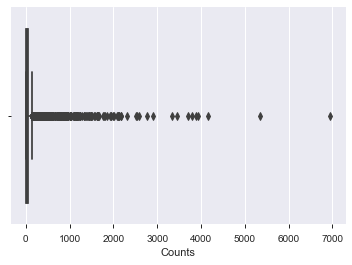

In [329]:
sns.boxplot(x=dfnew['Counts'])

In [330]:
mean = np.mean(dfnew['Counts']) 
std = np.std(dfnew['Counts']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 141.39926402943883
std. deviation is 425.01642342790893


In [331]:
from scipy import stats
z = np.abs(stats.zscore(dfnew['Counts']))
print(z)

[0.45316069 0.31622134 0.00376629 ... 0.32327989 0.33033844 0.33033844]


In [332]:
for x in range(len(z)): 
    print (z[x])

0.4531606906320652
0.3162213425670968
0.0037662920356128153
0.3849280332535463
12.273880368896865
0.2550472359518729
1.403712193422467
4.184781194160722
0.3279855938392552
0.3214010763838907
2.582490170892743
3.222465440098162
2.384850749520481
1.1213701628906647
1.8531065920189196
2.3636750972305958
6.514102946048094
0.3256327435848235
4.3541864124798035
0.2014057134078746
3.1801141355183917
0.14964300781037748
0.041411896106519824
1.2390126756122488
8.925774456840575
1.926044949906302
4.241249600267083
0.041411896106519824
0.6131545079334201
0.20328453035437574
4.789463709549667
0.32092704307596015
0.11858192119483496
2.5024932622420653
0.29975139078607493
2.09074446771652
0.23387158366198768
0.2037585636623063
6.18705676068209
2.9236534577853375
0.29975139078607493
1.5472360589428
0.13082020577492398
0.28328143900505315
1.5637060107238219
0.27904977180412033
0.07905750017742684
3.3377551025653145
16.02667652471541
2.4389663053724098
0.6625643632764855
0.2903399897683482
0.0597606648

0.3303384440936869
0.31857419282152843
0.27622288824175806
0.3256327435848235
0.3303384440936869
0.3303384440936869
0.3044570912949383
0.2550472359518729
0.3279855938392552
0.3091627918038017
0.22446018264426093
0.23622443391641937
0.3303384440936869
0.3303384440936869
0.3303384440936869
0.2926928400227799
0.3303384440936869
0.28092858875062143
0.24563583493414612
0.3232798933303918
0.2738700379873264
0.3303384440936869
0.3279855938392552
0.3303384440936869
0.231518733407556
0.3303384440936869
0.2856342892594848
0.3115156420582334
0.2785757384961898
0.3279855938392552
0.2926928400227799
0.1468161242480152
0.31386849231266506
0.29975139078607493
0.19670001289901123
0.3303384440936869
0.31857419282152843
0.3256327435848235
0.08328916737835965
0.2973985405316433
0.28092858875062143
0.2926928400227799
0.18023006111798942
0.2856342892594848
0.3303384440936869
0.28328143900505315
0.28328143900505315
0.3091627918038017
0.31386849231266506
0.3256327435848235
0.3303384440936869
0.31857419282152

0.3256327435848235
0.3303384440936869
0.3303384440936869
0.3232798933303918
0.3232798933303918
0.3303384440936869
0.3279855938392552
0.31857419282152843
0.3303384440936869
0.3303384440936869
0.3256327435848235
0.32092704307596015
0.3279855938392552
0.3256327435848235
0.3303384440936869
0.3256327435848235
0.3303384440936869
0.3303384440936869
0.3279855938392552
0.3279855938392552
0.3232798933303918
0.3303384440936869
0.3256327435848235
0.3256327435848235
0.3303384440936869
0.3279855938392552
0.3256327435848235
0.3303384440936869
0.3303384440936869
0.3303384440936869
0.3279855938392552
0.3303384440936869
0.3303384440936869
0.3232798933303918
0.3303384440936869
0.3303384440936869
0.3303384440936869
0.3303384440936869
0.3279855938392552
0.3279855938392552
0.3232798933303918
0.3303384440936869
0.3303384440936869


In [333]:
dfnew= dfnew[(z < 1)]

In [334]:
dfnew

,PARTY_ID,AMOUNT,VALUE_DATE,Counts
id,,,,
0,240924299,500000,22-08-2018,334
1,323871147,190000,22-08-2018,7
2,349707008,1454874,22-08-2018,143
4,240285235,369000,22-08-2018,305
7,240253860,275844,22-08-2018,33
...,...,...,...,...
304596,654066866,139700,30-09-2020,2
305390,633180744,2273,05-10-2020,2
305524,685219699,20140,21-10-2020,4


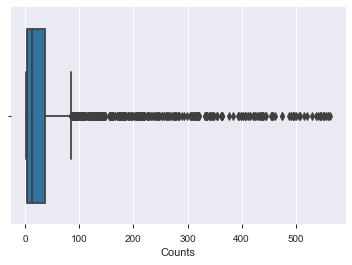

In [335]:
sns.boxplot(x=dfnew['Counts'])

In [336]:
#droping the duplicate id's which keep repeating as we don't need them now because we got the count of the total transaction within 
#made in four years of data
# dfnew=df1.drop_duplicates(subset=['PARTY_ID'])

In [337]:
dfnew

,PARTY_ID,AMOUNT,VALUE_DATE,Counts
id,,,,
0,240924299,500000,22-08-2018,334
1,323871147,190000,22-08-2018,7
2,349707008,1454874,22-08-2018,143
4,240285235,369000,22-08-2018,305
7,240253860,275844,22-08-2018,33
...,...,...,...,...
304596,654066866,139700,30-09-2020,2
305390,633180744,2273,05-10-2020,2
305524,685219699,20140,21-10-2020,4


In [338]:
dfnew['Counts'].describe()

count    2027.00000
mean       51.47114
std       100.45636
min         1.00000
25%         3.00000
50%        12.00000
75%        35.50000
max       564.00000
Name: Counts, dtype: float64

In [339]:
mean = np.mean(dfnew['Counts']) 
std = np.std(dfnew['Counts']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 51.47113961519487
std. deviation is 100.43157748991561


In [340]:
def find_cus(df):
    if df['Counts'] < 51:
        return 1
    else:
        return 0

In [341]:
dfnew['churn'] = dfnew.apply(find_cus,axis=1)

In [342]:
dfnew

,PARTY_ID,AMOUNT,VALUE_DATE,Counts,churn
id,,,,,
0,240924299,500000,22-08-2018,334,0
1,323871147,190000,22-08-2018,7,1
2,349707008,1454874,22-08-2018,143,0
4,240285235,369000,22-08-2018,305,0
7,240253860,275844,22-08-2018,33,1
...,...,...,...,...,...
304596,654066866,139700,30-09-2020,2,1
305390,633180744,2273,05-10-2020,2,1
305524,685219699,20140,21-10-2020,4,1


In [343]:
# dfnew.to_csv("Out_TransferHistory.csv")

417 0:No churn!
1610 1:Churn


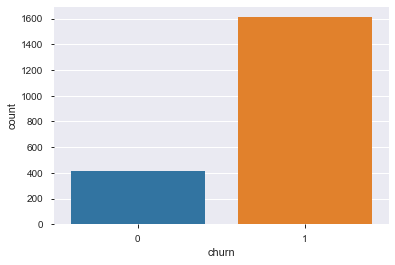

In [344]:
a=len(dfnew[dfnew.churn==0])
b=len(dfnew[dfnew.churn==1])
print(a,"0:No churn!")
print(b,"1:Churn")
sns.countplot(dfnew['churn'])#this function counts the values in a column and plots each differently according to the numbers

In [345]:
dfnew.drop(['churn'], axis=1, inplace=True)

In [346]:
dfnew.to_csv("Out_TransferHistory.csv")